# K-means

In [1]:
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt

#### Budowa zbioru $S$ elementów należących do dwóch klas.

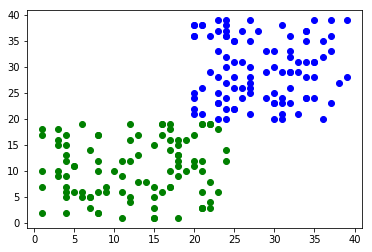

In [2]:
n = 100
x = np.array([np.random.randint(1,25, size=(n, )), np.random.randint(1,20, size=(n, ))])
y = np.array([np.random.randint(20,40, size=(n, )), np.random.randint(20,40, size=(n, ))])
labels = np.append(np.zeros(n),np.ones(n))

plt.plot(x[0],x[1], 'go')
plt.plot(y[0],y[1], 'bo')
plt.show()

y,x = y.T, x.T
S = np.append(y, x, axis=0)

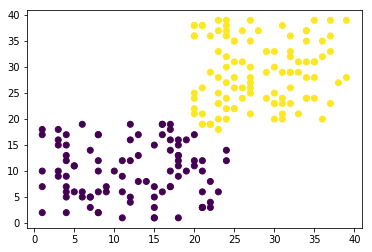

In [3]:
cls = cluster.KMeans(2)
cls.fit(S)
plt.scatter(S[:,0], S[:,1], c=cls.labels_)
plt.show()

### K-means zaimplementowane:
1. Wybierz $C$ próbek zawierających po $B$ elementów, następnie wylicz centroidy.

2. Policz dystanse dla każdej próbki od każdego z centroidów. 
3. Przypisz próbkę do klasy centroidu, który znajduje się najbliżej. 
4. Wylicz nowe położenia centroidów dla klas i powtórz kroki 2 i 3. Wykonuj dopóki odległości między centroidami w tym i poprzednim obrocie pętli nie są mniejsze niż dany parametr liczbowy. 

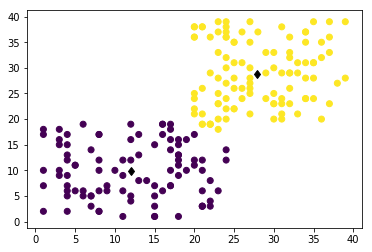

In [4]:
C = 2
B = 10

last_labels = np.zeros(2*n)
last_centroid_pos = np.zeros((C,2))
samples = np.array([np.random.choice(np.shape(S)[0], B) for i in range(C)])
centroid_samples = np.array([S[i] for i in samples])

while True:
    # Centroids cooridinates
    centroids = np.array([np.mean(c, axis=0) for c in centroid_samples])
    # Distances from every centroid and assignment of set elements to nearest centroid
    distances = np.array([np.sqrt((S[: ,0] - i[0])**2 + (S[: ,1] - i[1])**2) for i in centroids])
    label_mask = distances[:,:] == np.min(distances[:,:], axis=0)
    centroids_labels = np.sum([(index+1)*i for index, i in enumerate(label_mask)], axis=0)
    
    
    if( np.sum (np.sqrt(np.sum((centroids - last_centroid_pos)**2, axis=1))) < 1):
        break
    
    #if(np.sum(last_labels == centroids_labels)/centroids_labels.shape[0] > 0.9):
    #    break
    
    # To compare variable
    last_centroid_pos = centroids.copy()
    last_labels = centroids_labels.copy()

    centroid_maps = [np.unique(np.where(S*np.vstack(x))[0]) for x in label_mask]
    centroid_samples = np.array([S[mi] for mi in centroid_maps])
    
plt.plot(centroids[:,0], centroids[:,1], 'kd')
plt.scatter(S[:,0], S[:,1], c= centroids_labels)
plt.show()